In [1]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
from finite_volume.mathematiques import gauss_lobatto

p = 5

In [2]:
class Cell:
    def __init__(self, x: float = 0.0, y: float = 0.0, shape: tuple = (1, 1)):
        self.x0 = x
        self.y0 = y
        self.x1 = x + shape[0]
        self.y1 = y + shape[1]

    def plot(self, ax, color="black", linewidth=2, **kwargs):
        x0, y0 = self.x0, self.y0
        x1, y1 = self.x1, self.y1
        ax.plot(
            [x0, x0, x1, x1, x0],
            [y0, y1, y1, y0, y0],
            color=color,
            linewidth=linewidth,
            **kwargs,
        )

    def transform(self, x, y):
        x, y = np.asarray(x), np.asarray(y)
        # x coordinate
        m, b = np.linalg.solve(
            np.array([[-0.5, 1], [0.5, 1]]), np.array([self.x0, self.x1])
        )
        xout = m * x + b
        # y cooridnate
        m, b = np.linalg.solve(
            np.array([[-0.5, 1], [0.5, 1]]), np.array([self.y0, self.y1])
        )
        yout = m * y + b
        return xout, yout

    def overlay_slices(
        self, ax, x=[], y=[], color="grey", linestyle="--", linewidth=2, **kwargs
    ):
        xnew, ynew = self.transform(x, y)
        for xval in xnew:
            ax.plot(
                [xval, xval],
                [self.y0, self.y1],
                color=color,
                linestyle=linestyle,
                linewidth=linewidth,
                **kwargs,
            )
        for yval in ynew:
            ax.plot(
                [self.x0, self.x1],
                [yval, yval],
                color=color,
                linestyle=linestyle,
                linewidth=linewidth,
                **kwargs,
            )

    def overlay_nodes(
        self,
        ax,
        x=[],
        y=[],
        marker="o",
        markersize=9.5,
        markerfacecolor="blue",
        halfhalf=False,
        markerfacecoloralt="red",
        markeredgecolor="black",
        markeredgewidth=1,
        **kwargs,
    ):
        xnew, ynew = self.transform(x, y)
        for xval, yval in zip(xnew, ynew):
            halfhalf_config = {}
            if halfhalf and xval == self.x0:
                halfhalf_config = dict(
                    fillstyle="right", markerfacecoloralt=markerfacecoloralt
                )
            if halfhalf and xval == self.x1:
                halfhalf_config = dict(
                    fillstyle="left", markerfacecoloralt=markerfacecoloralt
                )
            if halfhalf and yval == self.y0:
                halfhalf_config = dict(
                    fillstyle="top", markerfacecoloralt=markerfacecoloralt
                )
            if halfhalf and yval == self.y1:
                halfhalf_config = dict(
                    fillstyle="bottom", markerfacecoloralt=markerfacecoloralt
                )
            ax.plot(
                xval,
                yval,
                marker=marker,
                markersize=markersize,
                markerfacecolor=markerfacecolor,
                markeredgecolor=markeredgecolor,
                markeredgewidth=markeredgewidth,
                **halfhalf_config,
                **kwargs,
            )

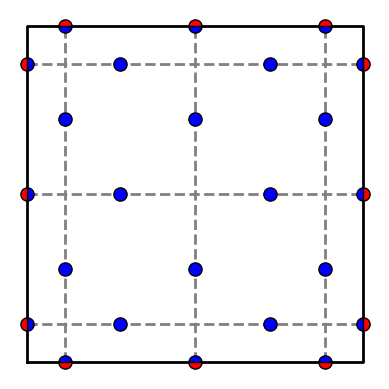

In [3]:
fig, ax = plt.subplots()

cell = Cell()
cell.plot(ax)

gausslegendre = np.polynomial.legendre.leggauss(int(np.ceil((p + 1) / 2)))[0] / 2
cell.overlay_slices(ax, x=gausslegendre, y=gausslegendre)

n_gausslobatto = int(np.ceil((p + 3) / 2))
gausslobatto = gauss_lobatto(n_gausslobatto)[0] / 2
for x in gausslegendre:
    cell.overlay_nodes(ax, x=[x] * n_gausslobatto, y=gausslobatto, halfhalf=True)
for y in gausslegendre:
    cell.overlay_nodes(ax, y=[y] * n_gausslobatto, x=gausslobatto, halfhalf=True)

plt.gca().set_aspect("equal")
plt.axis("off")


fig.savefig("images/ZS2D_quadrature.png", dpi=300, bbox_inches="tight")

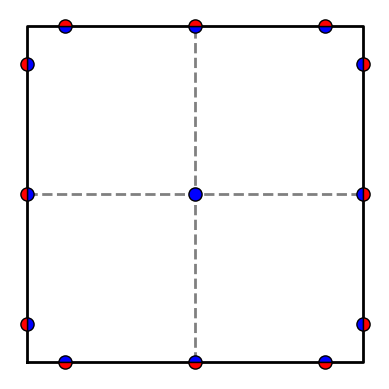

In [4]:
fig, ax = plt.subplots()

cell = Cell()
cell.plot(ax)

cell.overlay_slices(ax, x=[0], y=[0])

cell.overlay_nodes(ax, [0], [0])
n_gausslegendre = int(np.ceil((p + 1) / 2))
gausslegendre = np.polynomial.legendre.leggauss(n_gausslegendre)[0] / 2
for x in np.array([-0.5, 0.5]):
    cell.overlay_nodes(ax, y=gausslegendre, x=[x] * n_gausslegendre, halfhalf=True)
    cell.overlay_nodes(ax, x=gausslegendre, y=[x] * n_gausslegendre, halfhalf=True)


plt.gca().set_aspect("equal")
plt.axis("off")


fig.savefig("images/ZS2D-M_quadrature.png", dpi=300, bbox_inches="tight")

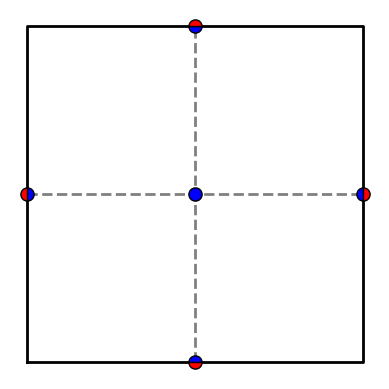

In [5]:
fig, ax = plt.subplots()

cell = Cell()
cell.plot(ax)

cell.overlay_slices(ax, x=[0], y=[0])
cell.overlay_nodes(ax, x=[0, -0.5, 0, 0.5, 0], y=[0, 0, 0.5, 0, -0.5], halfhalf=True)


plt.gca().set_aspect("equal")
plt.axis("off")

fig.savefig("images/ZS2D-T_quadrature.png", dpi=300, bbox_inches="tight")